# Some Important Points: 🔋 


1.   V(max) = 4.2 volt
2.   V(min) = 2.8/2.7 Volt
3.   Nominal Charge capacity = 2500 mA/2.5Ah 
4.   SOC = Normal Capacity at that point/Nominal capacity
5.   Nominal Capacity - ammount of charged deliverd by fully charge batter, when it is fresh. OR **we can say Total capacity of battery.**
6.   SOH = Maximum of SOC at one cycle.
7.   we can find SOH by making set of loops in dataset and then find max(SOC).


# Models 📌


1.   (DNN) Deep Neural Network 
2.   LSTM
3.   CNN
4.   GPR (Gaussian Progress Rregressor)
5.   Genetic Algorithms
6.   Support Vector Regressor
7.   Random Forest



# Model Partitioning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Reading the data
df = pd.read_csv("trial1.csv")
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C,Capacity/Ah,Nominal_Capacity/Ah
0,0.4,3.54,1.25,0.00,0.0,2.5
1,1.0,3.54,1.25,0.95,0.0,2.5
2,2.0,3.54,1.25,2.28,0.0,2.5
3,3.0,3.55,1.25,3.46,0.0,2.5
4,4.0,3.55,1.25,4.64,0.0,2.5


In [3]:
df.rename(columns= {'Time/sec':'Time', 'Potential/V':'Potential', 'Current/A':'Current', 'Charge/C':'Charge',
                    'Capacity/Ah':'Capacity', 'Nominal_Capacity/Ah':'Nominal_Capacity'},inplace=True)

In [4]:
df.insert(loc = 6,column ='SOC',value=df['Capacity']/2.31])  #  cmax

In [5]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC
0,0.4,3.54,1.25,0.00,0.0,2.5,0.0
1,1.0,3.54,1.25,0.95,0.0,2.5,0.0
2,2.0,3.54,1.25,2.28,0.0,2.5,0.0
3,3.0,3.55,1.25,3.46,0.0,2.5,0.0
4,4.0,3.55,1.25,4.64,0.0,2.5,0.0


In [6]:
df['Time'][0]=0

In [7]:
df.head(5)

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC
0,0.0,3.54,1.25,0.00,0.0,2.5,0.0
1,1.0,3.54,1.25,0.95,0.0,2.5,0.0
2,2.0,3.54,1.25,2.28,0.0,2.5,0.0
3,3.0,3.55,1.25,3.46,0.0,2.5,0.0
4,4.0,3.55,1.25,4.64,0.0,2.5,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              242885 non-null  float64
 1   Potential         242885 non-null  float64
 2   Current           242885 non-null  float64
 3   Charge            242885 non-null  float64
 4   Capacity          242885 non-null  float64
 5   Nominal_Capacity  242885 non-null  float64
 6   SOC               242885 non-null  float64
dtypes: float64(7)
memory usage: 13.0 MB


In [9]:
df.isnull().sum()

Time                0
Potential           0
Current             0
Charge              0
Capacity            0
Nominal_Capacity    0
SOC                 0
dtype: int64

In [10]:
df.describe()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC
count,242885.000000,242885.000000,242885.000000,242885.000000,242885.000000,242885.0,242885.000000
mean,124950.840424,3.839404,0.034547,5083.012369,1.412284,2.5,0.564913
std,72231.051000,0.385144,1.234725,3185.178306,0.884470,0.0,0.353788
min,0.000000,2.750000,-2.500000,0.000000,0.000000,2.5,0.000000
25%,62490.800000,3.440000,0.000000,1920.000000,0.530000,2.5,0.212000
50%,124983.000000,3.940000,0.080000,5790.000000,1.610000,2.5,0.644000
75%,187475.100000,4.200000,1.250000,8280.000000,2.300000,2.5,0.920000
max,249967.200000,4.200000,1.260000,8680.000000,2.410000,2.5,0.964000


In [11]:
callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

# Finding Integral SOC

In [12]:
from scipy.integrate import cumulative_trapezoid

In [13]:
p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

In [14]:
integral = (cumulative_trapezoid(q,p,initial=0))/(3600*2.31)

In [15]:
# plt.plot(p,integral)
# plt.xlabel('Time')
# plt.show()

In [16]:
df.loc[:, "Integral_soc"] = integral

Text(0.5, 1.0, 'Trial Dataset')

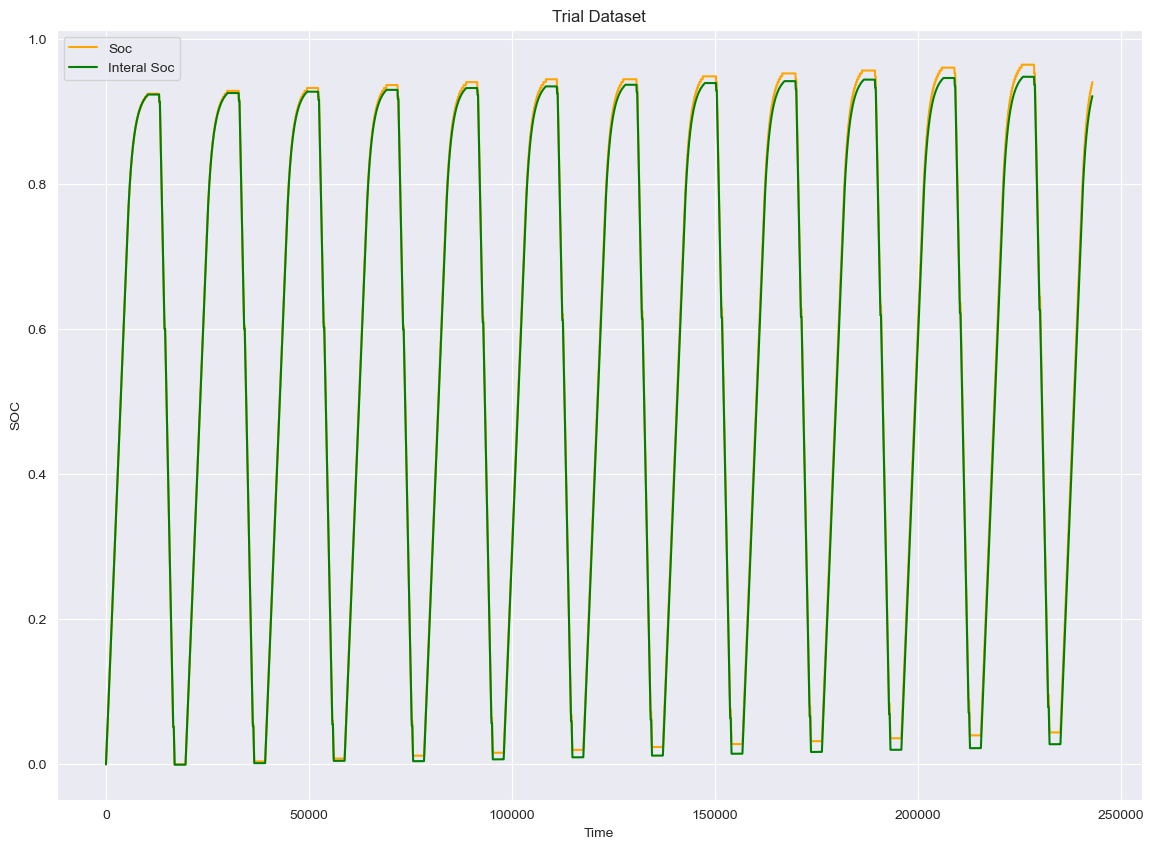

In [17]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['SOC'],color='orange')
plt.plot(df['Integral_soc'],color='green')
plt.ylabel('SOC')
plt.xlabel('Time')
plt.legend(["Soc", "Interal Soc"], loc ="upper left")
plt.title('Trial Dataset')

In [18]:
df.head(10)

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC,Integral_soc
0,0.0,3.54,1.25,0.00,0.0,2.5,0.0,0.000000
1,1.0,3.54,1.25,0.95,0.0,2.5,0.0,0.000139
2,2.0,3.54,1.25,2.28,0.0,2.5,0.0,0.000278
3,3.0,3.55,1.25,3.46,0.0,2.5,0.0,0.000417
4,4.0,3.55,1.25,4.64,0.0,2.5,0.0,0.000556
5,5.0,3.55,1.25,5.97,0.0,2.5,0.0,0.000694
6,6.0,3.55,1.25,7.15,0.0,2.5,0.0,0.000833
7,7.0,3.56,1.25,8.49,0.0,2.5,0.0,0.000972
8,8.0,3.56,1.25,9.67,0.0,2.5,0.0,0.001111
9,9.0,3.56,1.25,11.00,0.0,2.5,0.0,0.001250


# Normalizing the Values 

In [10]:
Nomical_capa = df.pop('Nominal_Capacity')

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Charge', 'Capacity','SOC'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [18]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC,Compu_soc,Compu_soc_try
0,0.0,3.54,1.25,0.00,0.0,2.5,0.0,0.000000,0.000000
1,1.0,3.54,1.25,0.95,0.0,2.5,0.0,0.000000,0.000000
2,2.0,3.54,1.25,2.28,0.0,2.5,0.0,0.000134,0.000134
3,3.0,3.55,1.25,3.46,0.0,2.5,0.0,0.000267,0.000267
4,4.0,3.55,1.25,4.64,0.0,2.5,0.0,0.000401,0.000401


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       242885 non-null  float64
 1   Potential  242885 non-null  float64
 2   Current    242885 non-null  float64
 3   Charge     242885 non-null  float64
 4   Capacity   242885 non-null  float64
 5   SOC        242885 non-null  float64
dtypes: float64(6)
memory usage: 11.1 MB


# Spliting the Data into train and test

In [14]:
Y = df.pop('SOC')
X = df

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [16]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((194308, 5), (48577, 5), (194308,), (48577,))

In [17]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [18]:
from sklearn.model_selection import cross_val_score


# DNN

## Model 1 DNN
Normal Deep earning neural network
with 3 layers and relu activation

In [19]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='linear'),
                               tf.keras.layers.Dense(20, activation = 'relu'),
                               tf.keras.layers.Dense(1,'linear')])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)



Epoch 1/100
6073/6073 [==============================] - 7s 1ms/step - loss: 0.0044 - rmse: 0.0346 - mae: 0.0044 - mse: 0.0012 - mape: 35033.7852 - val_loss: 0.0025 - val_rmse: 0.0026 - val_mae: 0.0025 - val_mse: 6.8985e-06 - val_mape: 34147.6094
Epoch 2/100
6073/6073 [==============================] - 7s 1ms/step - loss: 0.0014 - rmse: 0.0019 - mae: 0.0014 - mse: 3.5542e-06 - mape: 10695.6182 - val_loss: 9.0918e-04 - val_rmse: 0.0011 - val_mae: 9.0918e-04 - val_mse: 1.1391e-06 - val_mape: 13014.4795
Epoch 3/100
6073/6073 [==============================] - 7s 1ms/step - loss: 9.9104e-04 - rmse: 0.0013 - mae: 9.9104e-04 - mse: 1.6375e-06 - mape: 7849.4209 - val_loss: 6.0344e-04 - val_rmse: 7.3967e-04 - val_mae: 6.0344e-04 - val_mse: 5.4711e-07 - val_mape: 14400.0303
Epoch 4/100
6073/6073 [==============================] - 7s 1ms/step - loss: 7.8573e-04 - rmse: 0.0010 - mae: 7.8573e-04 - mse: 1.0153e-06 - mape: 7001.7358 - val_loss: 5.8105e-04 - val_rmse: 7.1104e-04 - val_mae: 5.8105e-04

In [20]:
model_1.evaluate(X_test,Y_test)

1519/1519 [==============================] - 1s 714us/step - loss: 1.2197e-04 - rmse: 1.2490e-04 - mae: 1.2197e-04 - mse: 1.5601e-08 - mape: 875.0659


[0.0001219738187501207,
 0.00012490306107793003,
 0.0001219738187501207,
 1.5600774005974927e-08,
 875.06591796875]

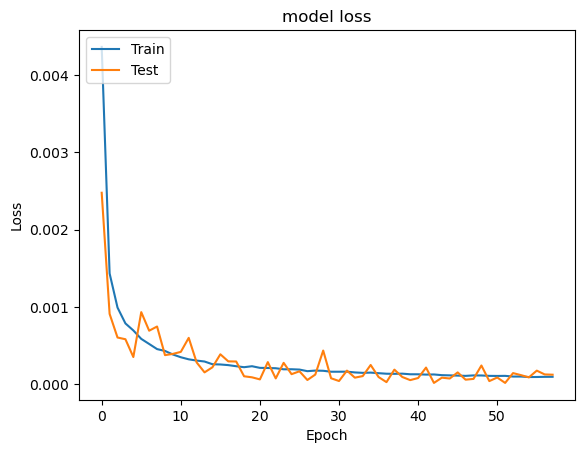

In [21]:
plot_his(history_1)

In [22]:
prediction = model_1.predict(X_test)
print(prediction[:10])

1519/1519 [==============================] - 1s 587us/step
[[0.94594175]
 [0.70108855]
 [0.43138516]
 [0.41483954]
 [0.9707883 ]
 [0.44806448]
 [0.87538576]
 [0.20741211]
 [0.9541945 ]
 [0.68874   ]]


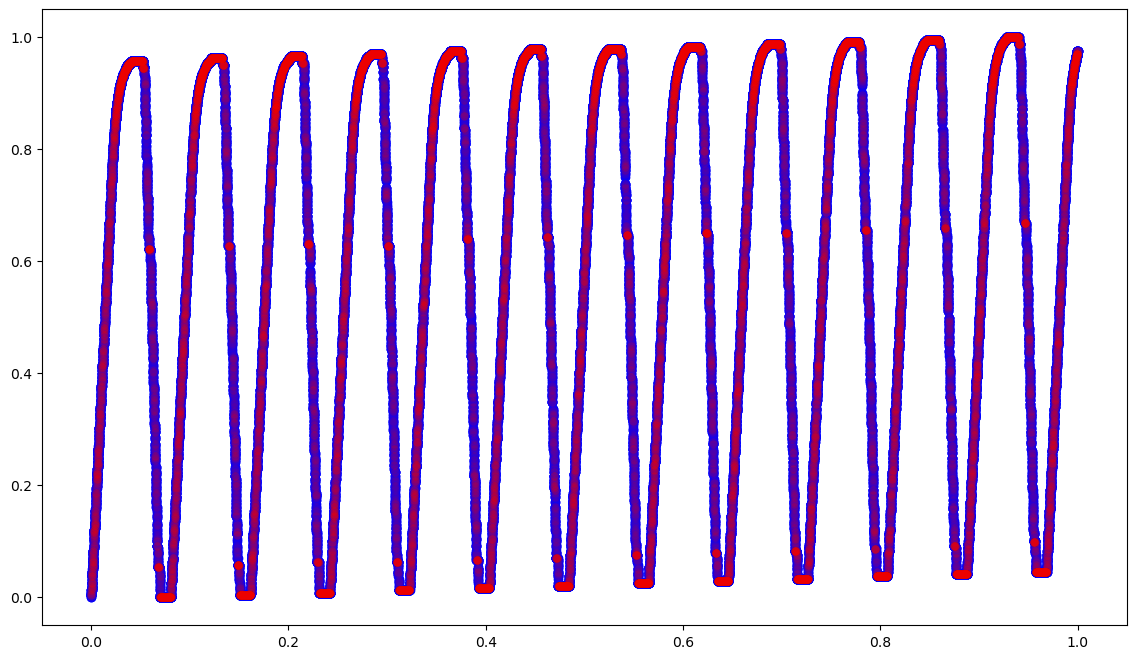

In [23]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction,color='red',alpha=0.05,linewidths=0.02)
plt.show()

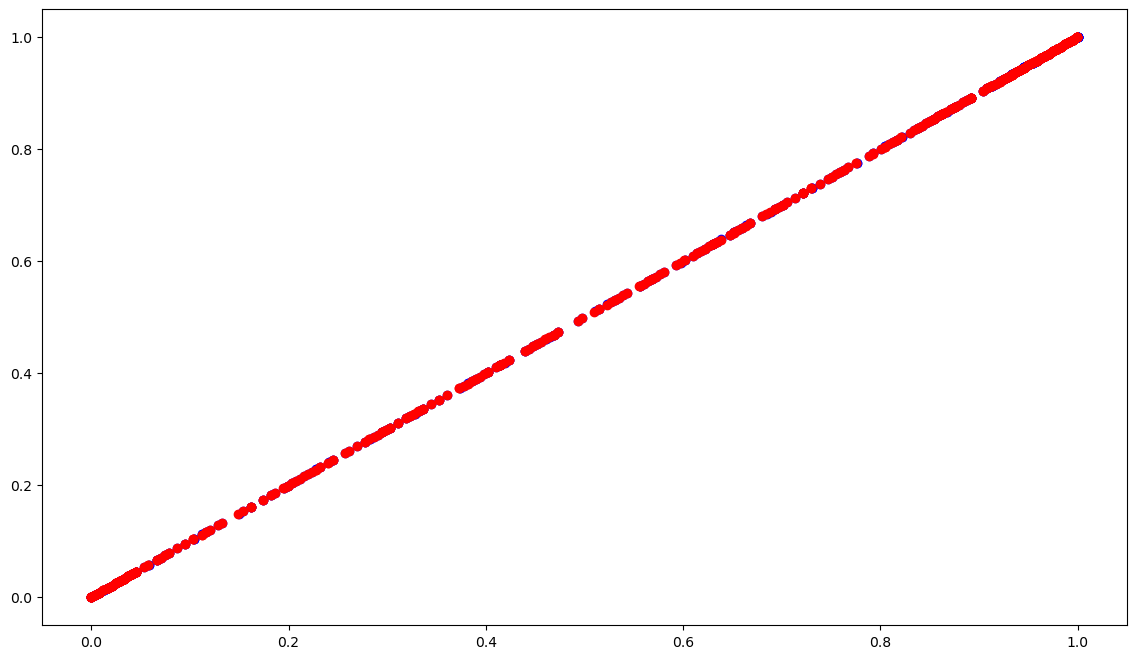

In [24]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction[300:900], prediction[300:900], color='red')
plt.show()

## Model 2 DNN

In [50]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([#tf.keras.layers.Dense(50, activation='linear'),
                                  tf.keras.layers.Dense(30,activation='relu'),
                                  tf.keras.layers.Dense(10),
                                  tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.metrics.mean_squared_error,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

#here using callback feature
history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test))

Epoch 1/100
6073/6073 [==============================] - 8s 1ms/step - loss: 5.2658e-04 - rmse: 0.0229 - mae: 0.0053 - mse: 5.2658e-04 - mape: 77487.9297 - val_loss: 5.7559e-06 - val_rmse: 0.0024 - val_mae: 0.0021 - val_mse: 5.7559e-06 - val_mape: 38637.5742
Epoch 2/100
6073/6073 [==============================] - 7s 1ms/step - loss: 2.8877e-06 - rmse: 0.0017 - mae: 0.0013 - mse: 2.8877e-06 - mape: 11312.4902 - val_loss: 9.0605e-07 - val_rmse: 9.5186e-04 - val_mae: 7.5681e-04 - val_mse: 9.0605e-07 - val_mape: 7464.6738
Epoch 3/100
6073/6073 [==============================] - 7s 1ms/step - loss: 2.1917e-06 - rmse: 0.0015 - mae: 0.0011 - mse: 2.1917e-06 - mape: 7407.3237 - val_loss: 3.7002e-06 - val_rmse: 0.0019 - val_mae: 0.0016 - val_mse: 3.7002e-06 - val_mape: 6071.6523
Epoch 4/100
6073/6073 [==============================] - 7s 1ms/step - loss: 1.6648e-06 - rmse: 0.0013 - mae: 9.5344e-04 - mse: 1.6648e-06 - mape: 5714.4829 - val_loss: 4.9207e-07 - val_rmse: 7.0147e-04 - val_mae: 5.56

6073/6073 [==============================] - 12s 2ms/step - loss: 2.6269e-07 - rmse: 5.1254e-04 - mae: 3.7144e-04 - mse: 2.6269e-07 - mape: 2425.4011 - val_loss: 1.1158e-07 - val_rmse: 3.3404e-04 - val_mae: 2.8644e-04 - val_mse: 1.1158e-07 - val_mape: 3562.7188
Epoch 62/100
6073/6073 [==============================] - 12s 2ms/step - loss: 2.4335e-07 - rmse: 4.9330e-04 - mae: 3.5515e-04 - mse: 2.4335e-07 - mape: 2380.2798 - val_loss: 4.3200e-08 - val_rmse: 2.0785e-04 - val_mae: 1.6705e-04 - val_mse: 4.3200e-08 - val_mape: 2343.0967
Epoch 63/100
6073/6073 [==============================] - 9s 2ms/step - loss: 2.6561e-07 - rmse: 5.1537e-04 - mae: 3.6749e-04 - mse: 2.6561e-07 - mape: 2515.9719 - val_loss: 1.0681e-07 - val_rmse: 3.2681e-04 - val_mae: 2.8032e-04 - val_mse: 1.0681e-07 - val_mape: 757.4926
Epoch 64/100
6073/6073 [==============================] - 9s 1ms/step - loss: 2.5027e-07 - rmse: 5.0027e-04 - mae: 3.5599e-04 - mse: 2.5027e-07 - mape: 2412.8652 - val_loss: 5.5721e-07 - val

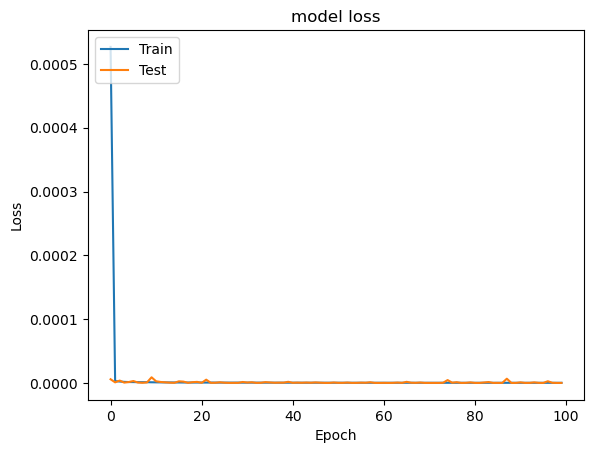

In [51]:
plot_his(history_2)

In [52]:
prediction_2 = model_2.predict(X_test)
print(prediction_2[:10])

1519/1519 [==============================] - 1s 913us/step
[[0.9458279 ]
 [0.70103735]
 [0.43134847]
 [0.41478336]
 [0.9706139 ]
 [0.44810158]
 [0.875273  ]
 [0.20744497]
 [0.95410997]
 [0.68884856]]


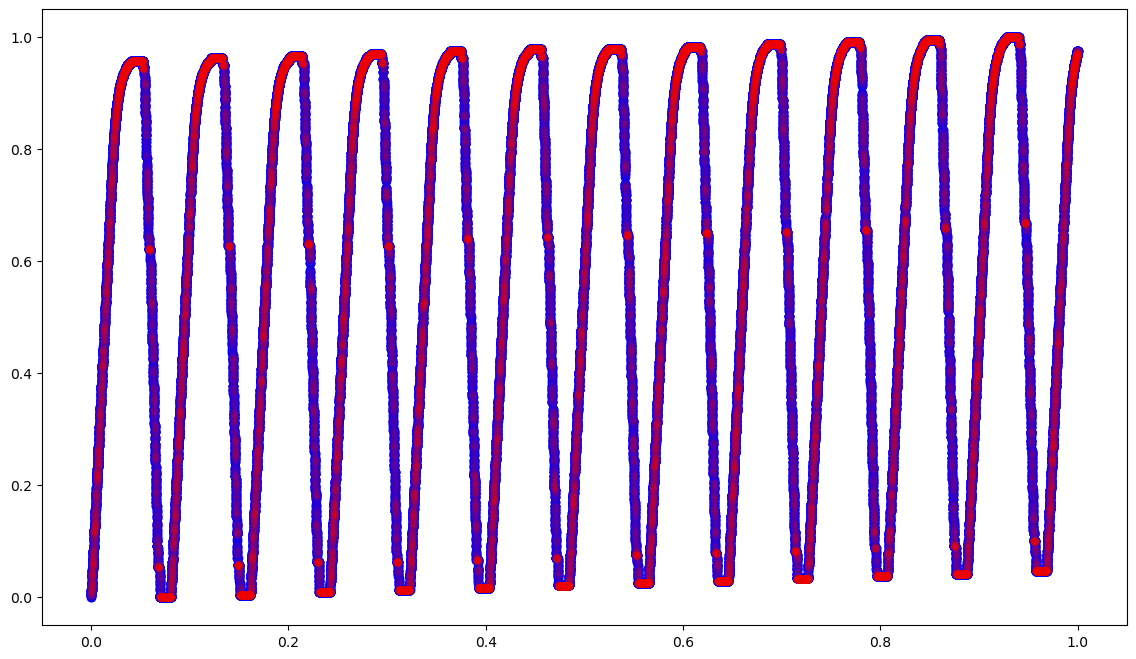

In [53]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_2,color='red',alpha=0.05,linewidths=0.02)
plt.show()

In [49]:
model_2.evaluate(X_test,Y_test)

1519/1519 [==============================] - 1s 865us/step - loss: 2.4989e-06 - rmse: 0.0016 - mae: 0.0015 - mse: 2.4989e-06 - mape: 13729.5488


[2.4989199118863326e-06,
 0.0015807972522452474,
 0.0014847330749034882,
 2.4989199118863326e-06,
 13729.548828125]

# Model 3 DNN

In [60]:
%%time
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(15, activation='linear'),
                                  tf.keras.layers.Dense(10, activation = 'linear'),
                                  tf.keras.layers.Dense(1,activation = 'linear')])

model_3.compile(loss = tf.keras.metrics.mean_squared_error,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

#here using callback feature
history_3 = model_3.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 7s 1ms/step - loss: 0.0019 - rmse: 0.0435 - mae: 0.0039 - mse: 0.0019 - mape: 36060.0781 - val_loss: 1.2222e-06 - val_rmse: 0.0011 - val_mae: 9.5011e-04 - val_mse: 1.2222e-06 - val_mape: 1619.3939
Epoch 2/100
6073/6073 [==============================] - 6s 1ms/step - loss: 1.3800e-05 - rmse: 0.0037 - mae: 0.0021 - mse: 1.3800e-05 - mape: 15611.0059 - val_loss: 2.4326e-05 - val_rmse: 0.0049 - val_mae: 0.0044 - val_mse: 2.4326e-05 - val_mape: 9665.4033
Epoch 3/100
6073/6073 [==============================] - 6s 1ms/step - loss: 5.7207e-06 - rmse: 0.0024 - mae: 0.0015 - mse: 5.7207e-06 - mape: 13049.8984 - val_loss: 1.4443e-06 - val_rmse: 0.0012 - val_mae: 0.0010 - val_mse: 1.4443e-06 - val_mape: 6302.3379
Epoch 4/100
6073/6073 [==============================] - 6s 1ms/step - loss: 3.5190e-06 - rmse: 0.0019 - mae: 0.0013 - mse: 3.5190e-06 - mape: 10456.3594 - val_loss: 2.8573e-07 - val_rmse: 5.3453e-04 - val_mae: 4.3521e-04 - val_ms

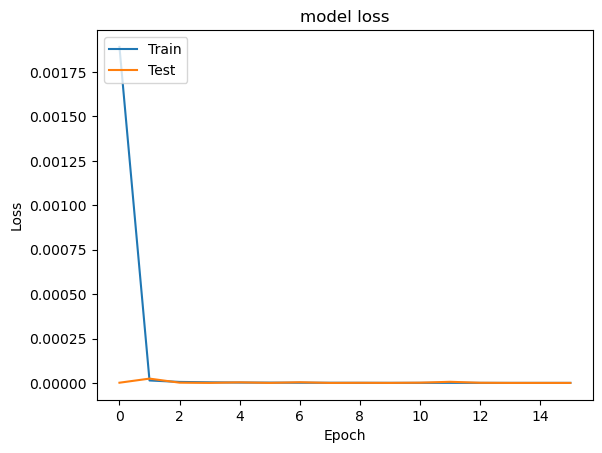

In [61]:
plot_his(history_3)

In [62]:
model_3.evaluate(X_test,Y_test)

1519/1519 [==============================] - 1s 766us/step - loss: 6.0548e-08 - rmse: 2.4607e-04 - mae: 1.9839e-04 - mse: 6.0548e-08 - mape: 4071.6016


[6.054832368818097e-08,
 0.00024606569786556065,
 0.00019838933076243848,
 6.054832368818097e-08,
 4071.6015625]

In [63]:
prediction_3 = model_3.predict(X_test)

1519/1519 [==============================] - 1s 598us/step


# Model 4 DNN

In [152]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(50,activation='relu'),
                                  tf.keras.layers.Dense(20),
                                  tf.keras.layers.Dense(10, activation = 'relu'),
                                  tf.keras.layers.Dense(1,activation = 'linear')])

model_4.compile(loss = tf.keras.metrics.mean_squared_error,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

#here using callback feature
history_4 = model_4.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 11s 2ms/step - loss: 6.0227e-04 - rmse: 0.0245 - mae: 0.0039 - mse: 6.0227e-04 - mape: 68730.7734 - val_loss: 2.0220e-06 - val_rmse: 0.0014 - val_mae: 0.0011 - val_mse: 2.0220e-06 - val_mape: 3377.2397
Epoch 2/100
6073/6073 [==============================] - 10s 2ms/step - loss: 3.8207e-06 - rmse: 0.0020 - mae: 0.0015 - mse: 3.8207e-06 - mape: 8891.6172 - val_loss: 1.3010e-04 - val_rmse: 0.0114 - val_mae: 0.0104 - val_mse: 1.3010e-04 - val_mape: 30507.3145
Epoch 3/100
6073/6073 [==============================] - 10s 2ms/step - loss: 3.2708e-06 - rmse: 0.0018 - mae: 0.0013 - mse: 3.2708e-06 - mape: 9270.0547 - val_loss: 1.3726e-06 - val_rmse: 0.0012 - val_mae: 9.5374e-04 - val_mse: 1.3726e-06 - val_mape: 6560.9995
Epoch 4/100
6073/6073 [==============================] - 10s 2ms/step - loss: 2.4694e-06 - rmse: 0.0016 - mae: 0.0012 - mse: 2.4694e-06 - mape: 8270.4746 - val_loss: 5.4972e-07 - val_rmse: 7.4143e-04 - val_mae: 6.0433e-0

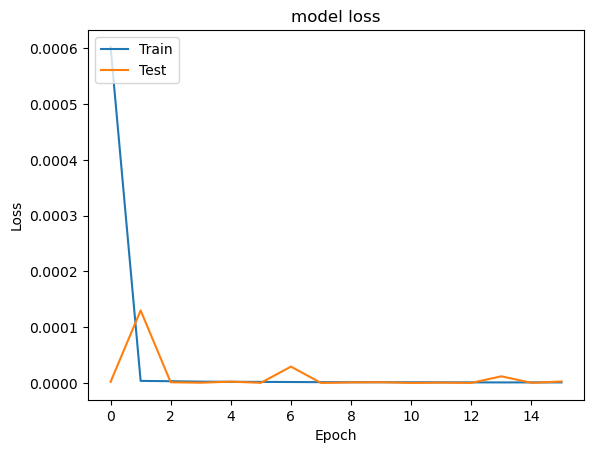

In [153]:
plot_his(history_4)

In [154]:
model_4.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 2.7281e-06 - rmse: 0.0017 - mae: 0.0015 - mse: 2.7281e-06 - mape: 3828.5110


[2.7280873382551363e-06,
 0.0016516923205927014,
 0.0015421925345435739,
 2.7280873382551363e-06,
 3828.510986328125]

In [155]:
prediction_4 = model_4.predict(X_test)

1519/1519 [==============================] - 1s 862us/step


# LSTM
LSTM ( Long short term memory)


## Model 5

In [67]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'relu',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/50
6073/6073 [==============================] - 24s 4ms/step - loss: 0.0130 - rmse: 0.0539 - mae: 0.0130 - mse: 0.0029 - mape: 168467.1562 - val_loss: 0.0036 - val_rmse: 0.0040 - val_mae: 0.0036 - val_mse: 1.5762e-05 - val_mape: 16943.5488
Epoch 2/50
6073/6073 [==============================] - 23s 4ms/step - loss: 0.0025 - rmse: 0.0032 - mae: 0.0025 - mse: 1.0094e-05 - mape: 22013.6484 - val_loss: 0.0012 - val_rmse: 0.0016 - val_mae: 0.0012 - val_mse: 2.6394e-06 - val_mape: 6946.8442
Epoch 3/50
6073/6073 [==============================] - 31s 5ms/step - loss: 0.0017 - rmse: 0.0022 - mae: 0.0017 - mse: 5.0099e-06 - mape: 16767.6035 - val_loss: 0.0020 - val_rmse: 0.0021 - val_mae: 0.0020 - val_mse: 4.5475e-06 - val_mape: 29526.7891
Epoch 4/50
6073/6073 [==============================] - 30s 5ms/step - loss: 0.0014 - rmse: 0.0018 - mae: 0.0014 - mse: 3.2196e-06 - mape: 14375.2510 - val_loss: 0.0035 - val_rmse: 0.0038 - val_mae: 0.0035 - val_mse: 1.4729e-05 - val_mape: 15788.1074


In [68]:
model_5.evaluate(X_test,Y_test)

1519/1519 [==============================] - 3s 2ms/step - loss: 2.4569e-04 - rmse: 3.0275e-04 - mae: 2.4569e-04 - mse: 9.1655e-08 - mape: 1296.2883


[0.00024569209199398756,
 0.00030274628079496324,
 0.00024569209199398756,
 9.165530912014219e-08,
 1296.288330078125]

In [69]:
model_5.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_7 (LSTM)               (None, 10)                2440      
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


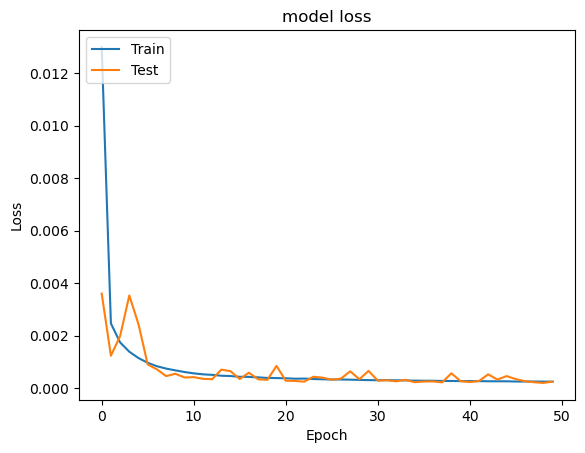

In [70]:
plot_his(history_5)

In [71]:
prediction_5 = model_5.predict(X_test)
print(prediction_5[:20])

1519/1519 [==============================] - 5s 3ms/step
[[0.9458421 ]
 [0.70143706]
 [0.4314568 ]
 [0.41450697]
 [0.9705054 ]
 [0.44800645]
 [0.87523896]
 [0.20751536]
 [0.9542392 ]
 [0.6883348 ]
 [0.9786633 ]
 [0.96237767]
 [0.03307644]
 [0.04120984]
 [0.31512895]
 [0.4642611 ]
 [0.96657366]
 [0.08277343]
 [0.0412185 ]
 [0.70561886]]


In [72]:
# plt.figure(figsize=(10, 8))
# plt.title('Test set')
# plt.xlabel('Cycle')
# plt.ylabel('SOH (%)')
# plt.plot(X_test['Time'],prediction_2,label='Prediction')
# plt.plot(X_test['Time'],Y_test,label='Actual')
# plt.legend()

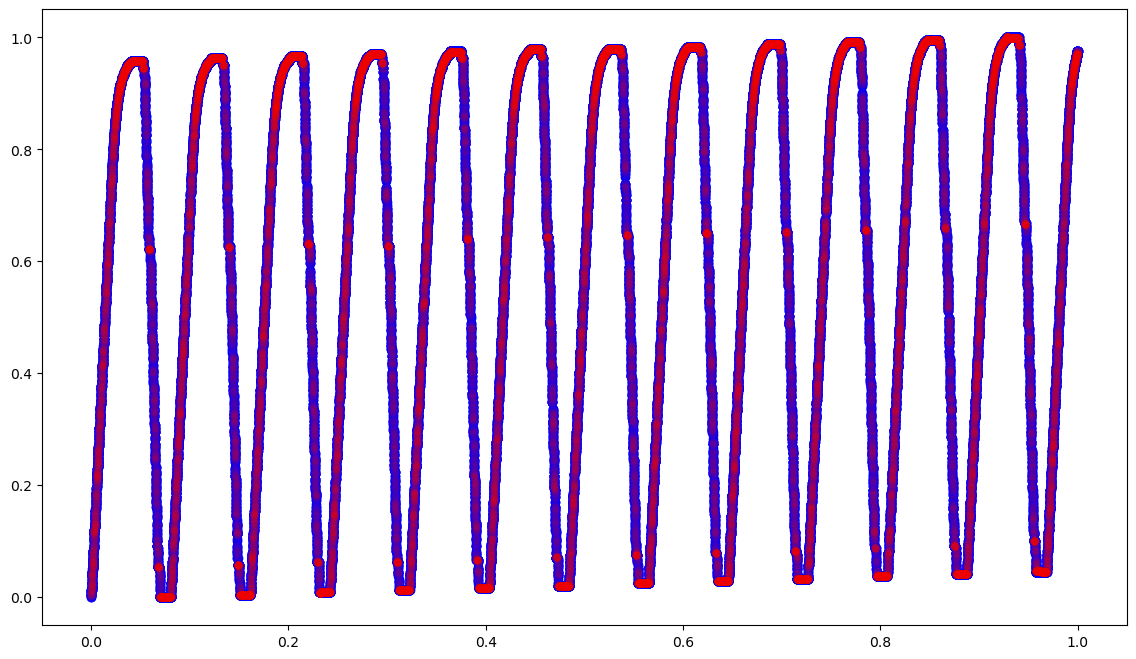

In [73]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_5,color='red',alpha=0.05,linewidths=0.02)
plt.show()

## Model 6
Best

In [74]:
%%time
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'relu',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
6073/6073 [==============================] - 35s 5ms/step - loss: 0.0142 - rmse: 0.0560 - mae: 0.0142 - mse: 0.0031 - mape: 212295.6094 - val_loss: 0.0030 - val_rmse: 0.0035 - val_mae: 0.0030 - val_mse: 1.1931e-05 - val_mape: 6191.6997
Epoch 2/40
6073/6073 [==============================] - 33s 5ms/step - loss: 0.0029 - rmse: 0.0038 - mae: 0.0029 - mse: 1.4582e-05 - mape: 24143.0156 - val_loss: 0.0027 - val_rmse: 0.0031 - val_mae: 0.0027 - val_mse: 9.3409e-06 - val_mape: 22253.8789
Epoch 3/40
6073/6073 [==============================] - 33s 5ms/step - loss: 0.0021 - rmse: 0.0028 - mae: 0.0021 - mse: 7.6680e-06 - mape: 17825.9375 - val_loss: 8.5805e-04 - val_rmse: 0.0011 - val_mae: 8.5805e-04 - val_mse: 1.2072e-06 - val_mape: 22987.5273
Epoch 4/40
6073/6073 [==============================] - 33s 5ms/step - loss: 0.0016 - rmse: 0.0021 - mae: 0.0016 - mse: 4.4559e-06 - mape: 13209.9951 - val_loss: 5.7780e-04 - val_rmse: 7.6468e-04 - val_mae: 5.7780e-04 - val_mse: 5.8474e-07 - v

In [75]:
model_6.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 5, 70)             20160     
                                                                 
 lstm_9 (LSTM)               (None, 30)                12120     
                                                                 
 dense_38 (Dense)            (None, 20)                620       
                                                                 
 dense_39 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


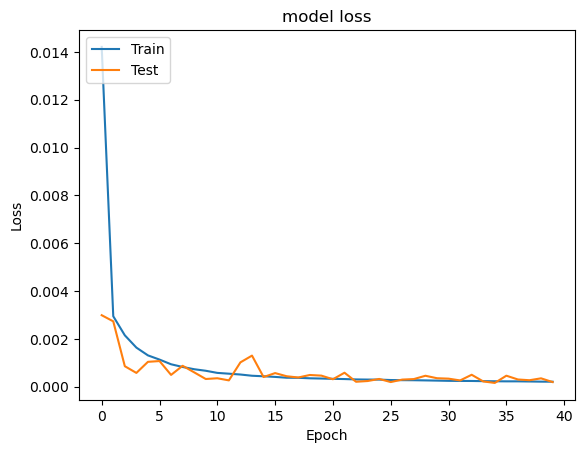

In [76]:
plot_his(history_6)

In [77]:
%%time
model_6.evaluate(X_test,Y_test)

1519/1519 [==============================] - 4s 2ms/step - loss: 1.9496e-04 - rmse: 2.4752e-04 - mae: 1.9496e-04 - mse: 6.1267e-08 - mape: 982.7383
CPU times: total: 7.72 s
Wall time: 3.72 s


[0.0001949604629771784,
 0.0002475226065143943,
 0.0001949604629771784,
 6.12674426747617e-08,
 982.7383422851562]

In [78]:
prediction_6 = model_6.predict(X_test)

1519/1519 [==============================] - 3s 2ms/step


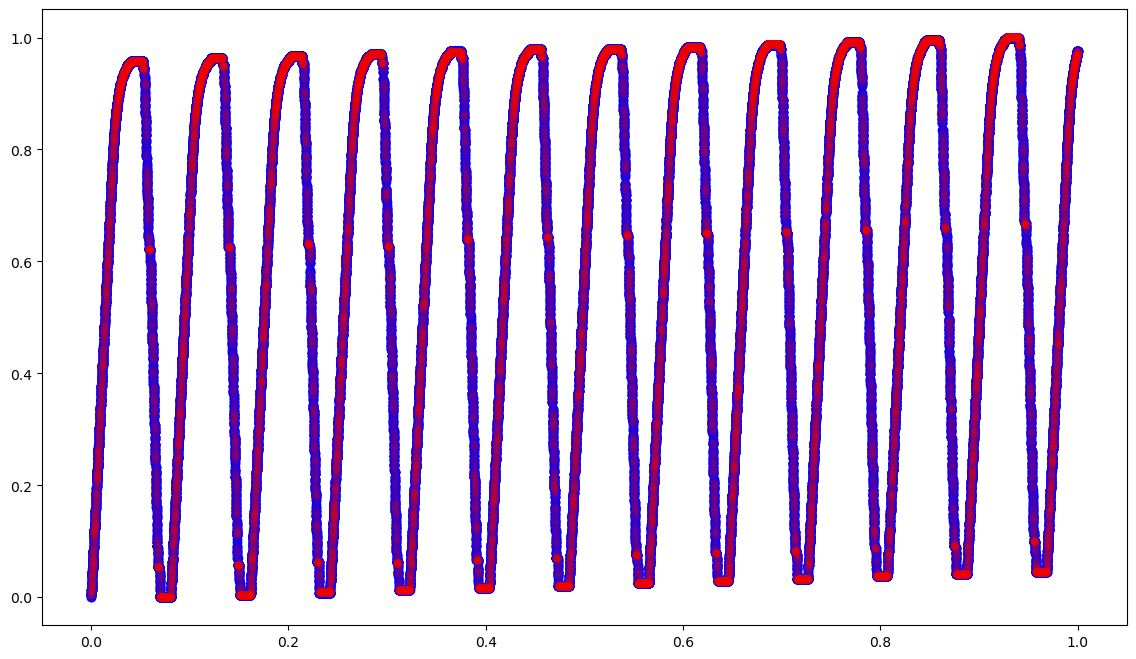

In [79]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_6,color='red',alpha=0.05,linewidths=0.02)
plt.show()

# Model 7

In [80]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'relu',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(10,activation='relu',return_sequences=True),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
6073/6073 [==============================] - 32s 5ms/step - loss: 0.1709 - rmse: 0.2629 - mae: 0.1709 - mse: 0.0691 - mape: 2917655.2500 - val_loss: 0.1122 - val_rmse: 0.2067 - val_mae: 0.1122 - val_mse: 0.0427 - val_mape: 1578230.6250
Epoch 2/70
6073/6073 [==============================] - 29s 5ms/step - loss: 0.1032 - rmse: 0.2008 - mae: 0.1032 - mse: 0.0403 - mape: 1649086.5000 - val_loss: 0.0977 - val_rmse: 0.1965 - val_mae: 0.0977 - val_mse: 0.0386 - val_mape: 1462511.7500
Epoch 3/70
6073/6073 [==============================] - 29s 5ms/step - loss: 0.0954 - rmse: 0.1963 - mae: 0.0954 - mse: 0.0385 - mape: 1581287.8750 - val_loss: 0.0921 - val_rmse: 0.1958 - val_mae: 0.0921 - val_mse: 0.0383 - val_mape: 1402304.6250
Epoch 4/70
6073/6073 [==============================] - 30s 5ms/step - loss: 0.0924 - rmse: 0.1958 - mae: 0.0924 - mse: 0.0383 - mape: 1505729.1250 - val_loss: 0.0914 - val_rmse: 0.1955 - val_mae: 0.0914 - val_mse: 0.0382 - val_mape: 1353733.7500
Epoch 5/70
6

6073/6073 [==============================] - 28s 5ms/step - loss: 0.0878 - rmse: 0.1941 - mae: 0.0878 - mse: 0.0377 - mape: 1516793.6250 - val_loss: 0.0876 - val_rmse: 0.1937 - val_mae: 0.0876 - val_mse: 0.0375 - val_mape: 1379342.7500
Epoch 68/70
6073/6073 [==============================] - 28s 5ms/step - loss: 0.0878 - rmse: 0.1940 - mae: 0.0878 - mse: 0.0377 - mape: 1516371.0000 - val_loss: 0.0876 - val_rmse: 0.1938 - val_mae: 0.0876 - val_mse: 0.0375 - val_mape: 1380514.1250
Epoch 69/70
6073/6073 [==============================] - 28s 5ms/step - loss: 0.0878 - rmse: 0.1941 - mae: 0.0878 - mse: 0.0377 - mape: 1516633.7500 - val_loss: 0.0876 - val_rmse: 0.1938 - val_mae: 0.0876 - val_mse: 0.0375 - val_mape: 1381885.0000
Epoch 70/70
6073/6073 [==============================] - 28s 5ms/step - loss: 0.0878 - rmse: 0.1941 - mae: 0.0878 - mse: 0.0377 - mape: 1517898.3750 - val_loss: 0.0876 - val_rmse: 0.1937 - val_mae: 0.0876 - val_mse: 0.0375 - val_mape: 1379391.3750


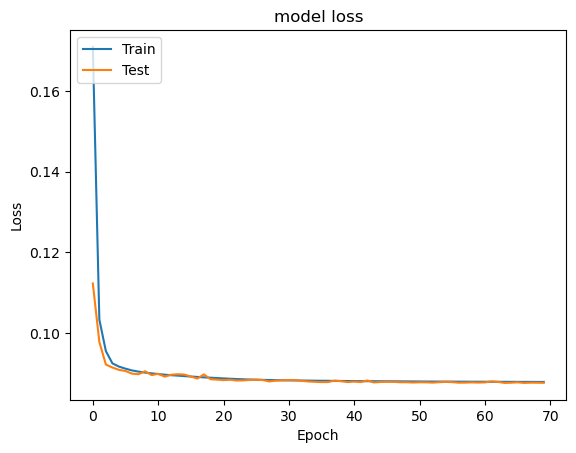

In [81]:
plot_his(history_7)

In [82]:
prediction_7 = model_7.predict(X_test)

1519/1519 [==============================] - 3s 2ms/step


In [83]:
%%time
model_7.evaluate(X_test,Y_test)

1519/1519 [==============================] - 3s 2ms/step - loss: 0.0876 - rmse: 0.1937 - mae: 0.0876 - mse: 0.0375 - mape: 1379391.3750
CPU times: total: 6.67 s
Wall time: 3.57 s


[0.08758524805307388,
 0.19374820590019226,
 0.08758524805307388,
 0.03753839060664177,
 1379391.375]

# Model 8

In [84]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'relu',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
6073/6073 [==============================] - 35s 6ms/step - loss: 0.0142 - rmse: 0.0560 - mae: 0.0142 - mse: 0.0031 - mape: 212295.6094 - val_loss: 0.0030 - val_rmse: 0.0035 - val_mae: 0.0030 - val_mse: 1.1931e-05 - val_mape: 6191.6997
Epoch 2/40
6073/6073 [==============================] - 35s 6ms/step - loss: 0.0029 - rmse: 0.0038 - mae: 0.0029 - mse: 1.4582e-05 - mape: 24143.0156 - val_loss: 0.0027 - val_rmse: 0.0031 - val_mae: 0.0027 - val_mse: 9.3409e-06 - val_mape: 22253.8789
Epoch 3/40
6073/6073 [==============================] - 34s 6ms/step - loss: 0.0021 - rmse: 0.0028 - mae: 0.0021 - mse: 7.6680e-06 - mape: 17825.9375 - val_loss: 8.5805e-04 - val_rmse: 0.0011 - val_mae: 8.5805e-04 - val_mse: 1.2072e-06 - val_mape: 22987.5273
Epoch 4/40
6073/6073 [==============================] - 34s 6ms/step - loss: 0.0016 - rmse: 0.0021 - mae: 0.0016 - mse: 4.4559e-06 - mape: 13209.9951 - val_loss: 5.7780e-04 - val_rmse: 7.6468e-04 - val_mae: 5.7780e-04 - val_mse: 5.8474e-07 - v

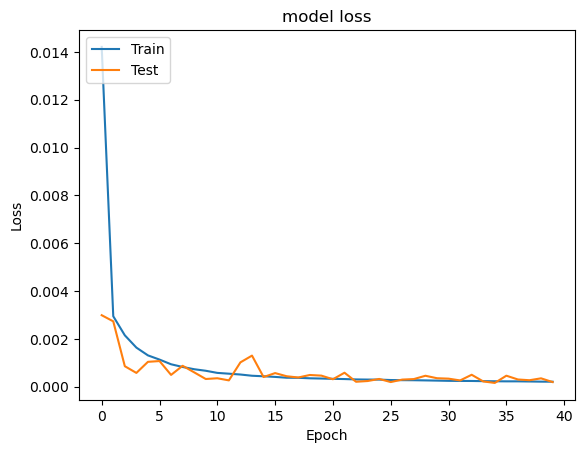

In [85]:
plot_his(history_8)

In [86]:
prediction_8 = model_8.predict(X_test)

1519/1519 [==============================] - 3s 2ms/step


In [87]:
%%time
model_8.evaluate(X_test,Y_test)

1519/1519 [==============================] - 4s 2ms/step - loss: 1.9496e-04 - rmse: 2.4752e-04 - mae: 1.9496e-04 - mse: 6.1267e-08 - mape: 982.7383
CPU times: total: 6.89 s
Wall time: 3.71 s


[0.0001949604629771784,
 0.0002475226065143943,
 0.0001949604629771784,
 6.12674426747617e-08,
 982.7383422851562]

# CNN

## Model 9
CNN

In [88]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='linear',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
6073/6073 [==============================] - 22s 3ms/step - loss: 0.0051 - rmse: 0.0384 - mae: 0.0051 - mse: 0.0015 - mape: 43782.4492 - val_loss: 0.0011 - val_rmse: 0.0014 - val_mae: 0.0011 - val_mse: 1.8261e-06 - val_mape: 15909.7715
Epoch 2/50
6073/6073 [==============================] - 22s 4ms/step - loss: 0.0012 - rmse: 0.0015 - mae: 0.0012 - mse: 2.2414e-06 - mape: 14316.8076 - val_loss: 0.0018 - val_rmse: 0.0021 - val_mae: 0.0018 - val_mse: 4.3017e-06 - val_mape: 25548.3691
Epoch 3/50
6073/6073 [==============================] - 20s 3ms/step - loss: 0.0011 - rmse: 0.0013 - mae: 0.0011 - mse: 1.7827e-06 - mape: 13376.6572 - val_loss: 9.6963e-04 - val_rmse: 0.0012 - val_mae: 9.6963e-04 - val_mse: 1.4204e-06 - val_mape: 20099.0820
Epoch 4/50
6073/6073 [==============================] - 20s 3ms/step - loss: 9.9080e-04 - rmse: 0.0012 - mae: 9.9080e-04 - mse: 1.5152e-06 - mape: 12460.5576 - val_loss: 8.0668e-04 - val_rmse: 9.5215e-04 - val_mae: 8.0668e-04 - val_mse: 9.0659

In [89]:
model_9.evaluate(X_test,Y_test)

1519/1519 [==============================] - 4s 3ms/step - loss: 1.4606e-04 - rmse: 1.8184e-04 - mae: 1.4606e-04 - mse: 3.3066e-08 - mape: 317.4159


[0.000146061327541247,
 0.00018184154760092497,
 0.000146061327541247,
 3.306634965838384e-08,
 317.4159240722656]

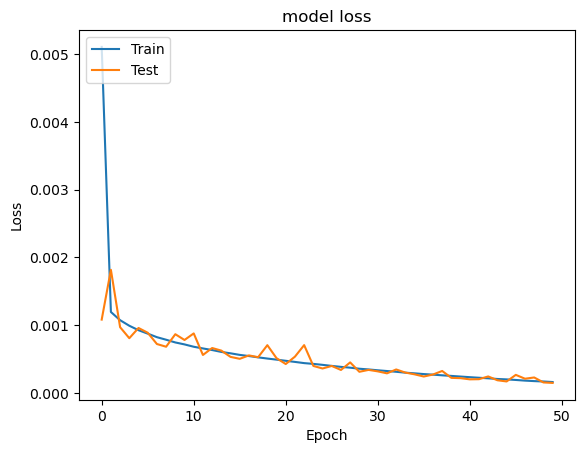

In [90]:
plot_his(history_9)

In [91]:
prediction_9 = model_9.predict(X_test)

1519/1519 [==============================] - 3s 2ms/step


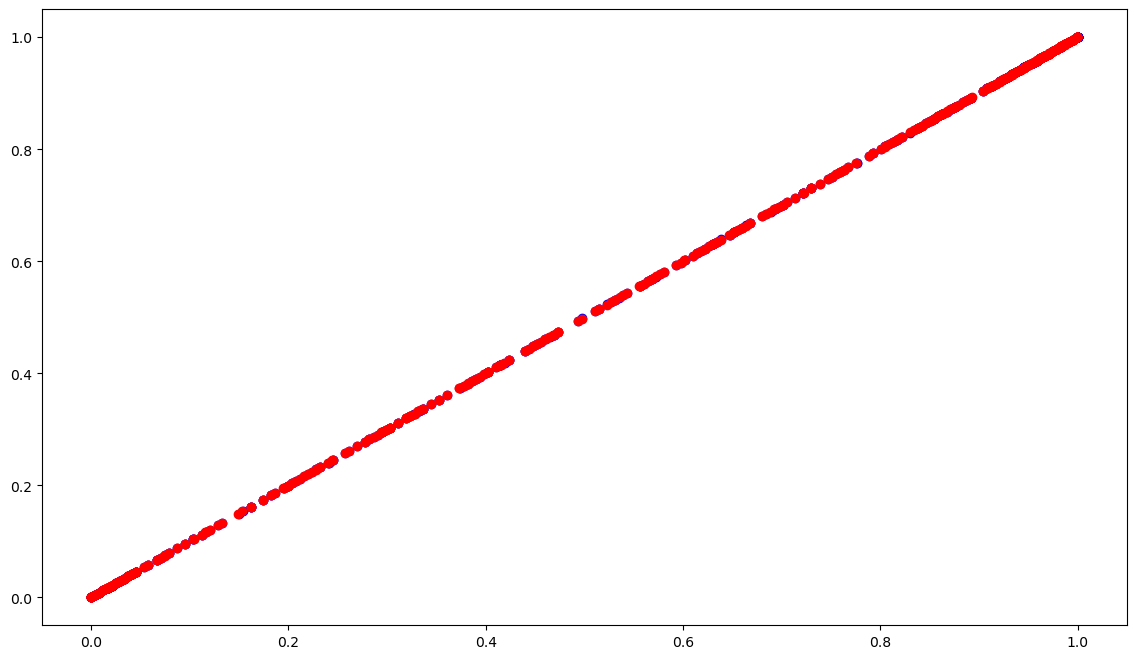

In [92]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_9[300:900], prediction_9[300:900], color='red')
plt.show()

## Model 10 (Best)

In [93]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='relu',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 25s 4ms/step - loss: 0.0078 - rmse: 0.0577 - mae: 0.0078 - mse: 0.0033 - mape: 82930.8359 - val_loss: 0.0022 - val_rmse: 0.0026 - val_mae: 0.0022 - val_mse: 6.7679e-06 - val_mape: 15331.8428
Epoch 2/100
6073/6073 [==============================] - 24s 4ms/step - loss: 0.0018 - rmse: 0.0023 - mae: 0.0018 - mse: 5.3977e-06 - mape: 21655.4199 - val_loss: 0.0012 - val_rmse: 0.0015 - val_mae: 0.0012 - val_mse: 2.4022e-06 - val_mape: 24898.7578
Epoch 3/100
6073/6073 [==============================] - 24s 4ms/step - loss: 0.0014 - rmse: 0.0018 - mae: 0.0014 - mse: 3.3399e-06 - mape: 19946.2246 - val_loss: 0.0018 - val_rmse: 0.0021 - val_mae: 0.0018 - val_mse: 4.2797e-06 - val_mape: 32265.3301
Epoch 4/100
6073/6073 [==============================] - 24s 4ms/step - loss: 0.0012 - rmse: 0.0015 - mae: 0.0012 - mse: 2.3407e-06 - mape: 19656.7832 - val_loss: 0.0019 - val_rmse: 0.0021 - val_mae: 0.0019 - val_mse: 4.5372e-06 - val_mape: 6631.96

Epoch 61/100
6073/6073 [==============================] - 24s 4ms/step - loss: 2.4170e-04 - rmse: 4.4240e-04 - mae: 2.4170e-04 - mse: 1.9571e-07 - mape: 10444.7070 - val_loss: 2.1779e-04 - val_rmse: 4.0313e-04 - val_mae: 2.1779e-04 - val_mse: 1.6252e-07 - val_mape: 10183.4238
Epoch 62/100
6073/6073 [==============================] - 24s 4ms/step - loss: 2.3976e-04 - rmse: 4.4029e-04 - mae: 2.3976e-04 - mse: 1.9386e-07 - mape: 10525.2275 - val_loss: 2.0228e-04 - val_rmse: 3.9518e-04 - val_mae: 2.0228e-04 - val_mse: 1.5617e-07 - val_mape: 9876.0029
Epoch 63/100
6073/6073 [==============================] - 23s 4ms/step - loss: 2.3894e-04 - rmse: 4.3918e-04 - mae: 2.3894e-04 - mse: 1.9288e-07 - mape: 10413.9951 - val_loss: 2.2279e-04 - val_rmse: 4.0126e-04 - val_mae: 2.2279e-04 - val_mse: 1.6101e-07 - val_mape: 8247.5322
Epoch 64/100
6073/6073 [==============================] - 23s 4ms/step - loss: 2.3802e-04 - rmse: 4.3821e-04 - mae: 2.3802e-04 - mse: 1.9203e-07 - mape: 10379.1533 - val_l

Epoch 91/100
6073/6073 [==============================] - 23s 4ms/step - loss: 2.0169e-04 - rmse: 3.9045e-04 - mae: 2.0169e-04 - mse: 1.5245e-07 - mape: 9270.3477 - val_loss: 1.8249e-04 - val_rmse: 3.5429e-04 - val_mae: 1.8249e-04 - val_mse: 1.2552e-07 - val_mape: 7196.0552
Epoch 92/100
6073/6073 [==============================] - 24s 4ms/step - loss: 2.0166e-04 - rmse: 3.8942e-04 - mae: 2.0166e-04 - mse: 1.5165e-07 - mape: 9198.6973 - val_loss: 1.9394e-04 - val_rmse: 3.5809e-04 - val_mae: 1.9394e-04 - val_mse: 1.2823e-07 - val_mape: 9627.9023
Epoch 92: early stopping
CPU times: total: 59min 30s
Wall time: 36min 42s


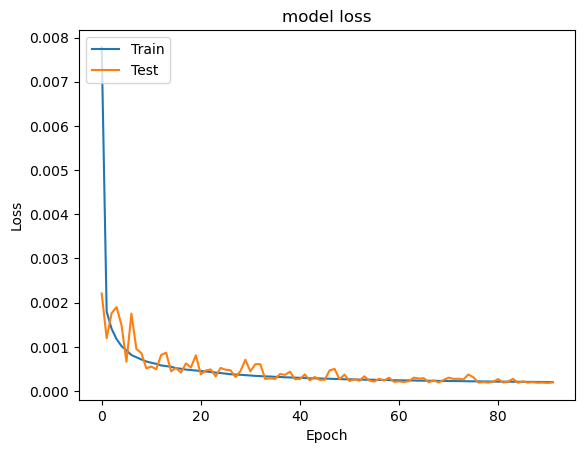

In [94]:
plot_his(history_10)

In [95]:
model_10.evaluate(X_test,Y_test)

1519/1519 [==============================] - 4s 3ms/step - loss: 1.9394e-04 - rmse: 3.5809e-04 - mae: 1.9394e-04 - mse: 1.2823e-07 - mape: 9627.9023


[0.00019394162518437952,
 0.0003580925986170769,
 0.00019394162518437952,
 1.2823031170228205e-07,
 9627.90234375]

In [96]:
prediction_10 = model_10.predict(X_test)

1519/1519 [==============================] - 3s 2ms/step


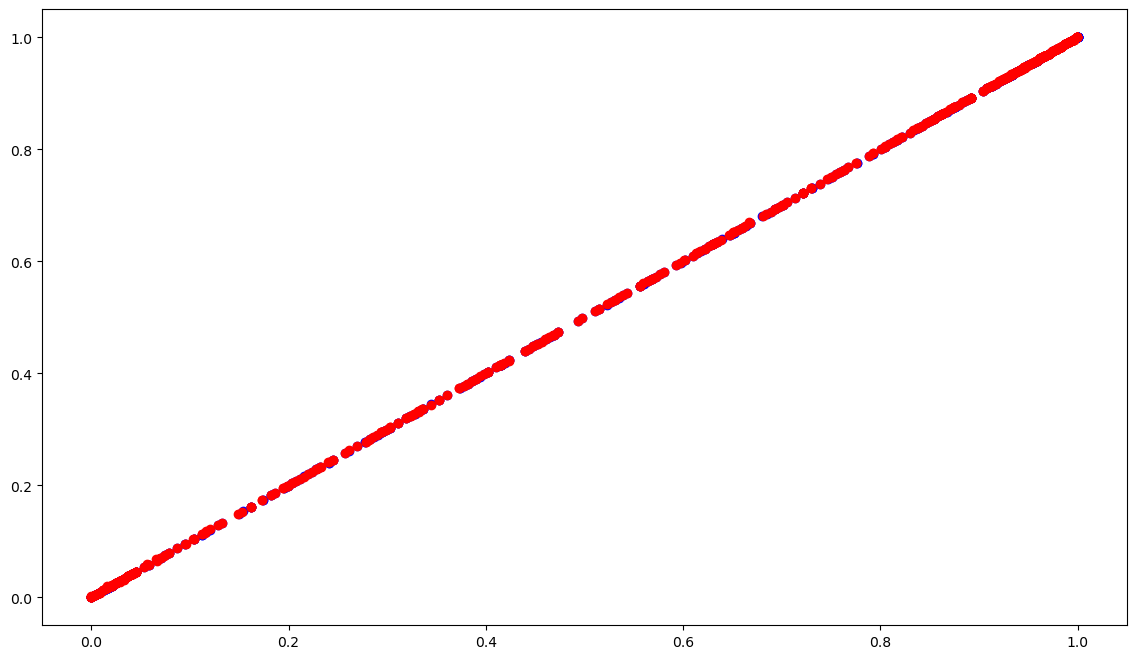

In [97]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_5[300:900], prediction_10[300:900], color='red')
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_10,color='red',alpha=0.05,linewidths=0.02,style='+')
plt.show()

In [ ]:
sns.lineplot(X_test['Time'],Y_test)
sns.lineplot(x = "Time", y = "Y_test", data=X_test,Y_test)
plt.show()

## Model 11 (Best)

In [144]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='relu',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(32,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="relu"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 14s 2ms/step - loss: 0.0149 - rmse: 0.0837 - mae: 0.0149 - mse: 0.0070 - mape: 98823.3359 - val_loss: 0.0012 - val_rmse: 0.0017 - val_mae: 0.0012 - val_mse: 2.9594e-06 - val_mape: 4661.1533
Epoch 2/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0013 - rmse: 0.0018 - mae: 0.0013 - mse: 3.4220e-06 - mape: 5971.4053 - val_loss: 0.0013 - val_rmse: 0.0017 - val_mae: 0.0013 - val_mse: 2.9372e-06 - val_mape: 11213.4775
Epoch 3/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0012 - rmse: 0.0017 - mae: 0.0012 - mse: 2.9185e-06 - mape: 5721.5557 - val_loss: 0.0011 - val_rmse: 0.0015 - val_mae: 0.0011 - val_mse: 2.3405e-06 - val_mape: 3635.6914
Epoch 4/100
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0012 - rmse: 0.0016 - mae: 0.0012 - mse: 2.5389e-06 - mape: 5184.7041 - val_loss: 0.0012 - val_rmse: 0.0016 - val_mae: 0.0012 - val_mse: 2.6261e-06 - val_mape: 5264.2563
Ep

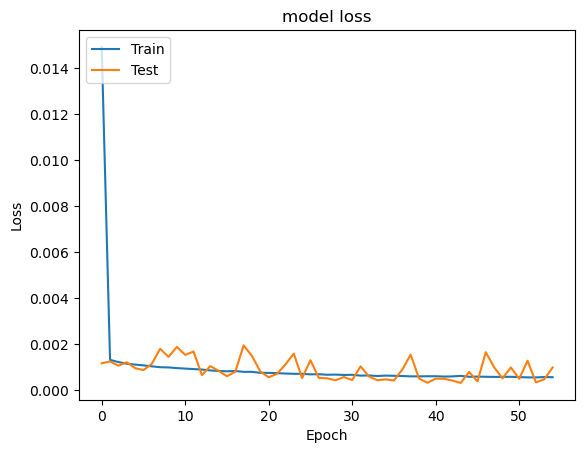

In [145]:
plot_his(history_11)

1519/1519 [==============================] - 2s 1ms/step


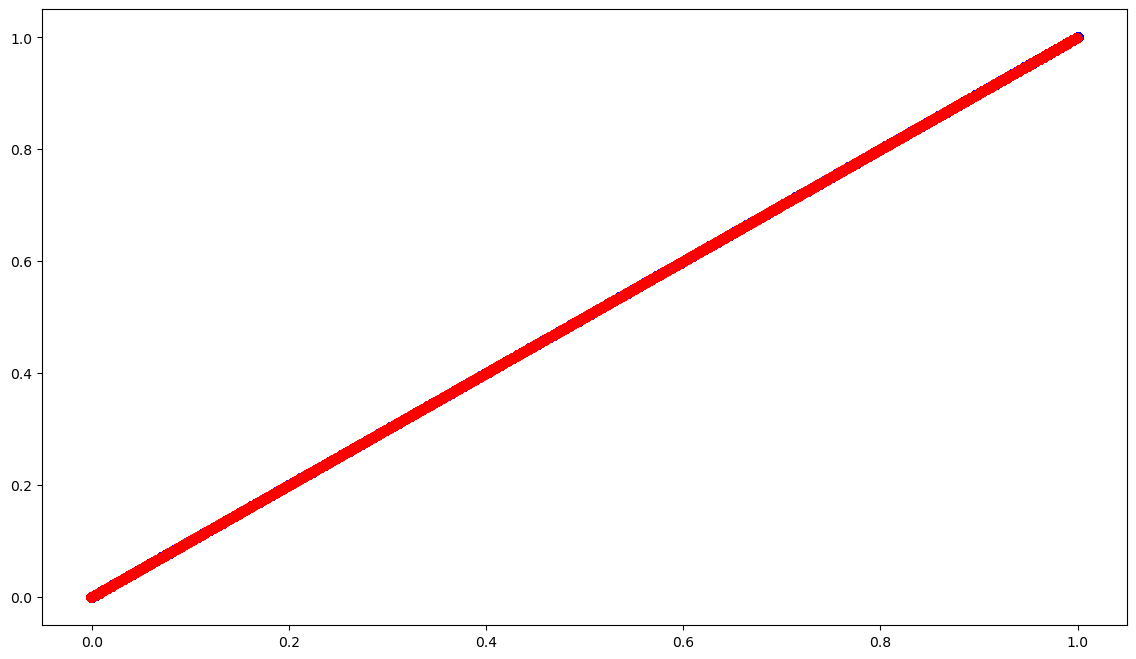

In [146]:
prediction_11 = model_11.predict(X_test)
plt.figure(figsize=(14,8))
plt.scatter(Y_test, Y_test, color='blue')
plt.scatter(prediction_11, prediction_11, color='red')
plt.show()

In [147]:
model_11.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 9.9921e-04 - rmse: 0.0011 - mae: 9.9921e-04 - mse: 1.1697e-06 - mape: 6351.7329


[0.0009992122650146484,
 0.0010815272107720375,
 0.0009992122650146484,
 1.169701135950163e-06,
 6351.73291015625]

## Model 12 (Best)

In [102]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='relu',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(8,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
6073/6073 [==============================] - 14s 2ms/step - loss: 0.0062 - rmse: 0.0438 - mae: 0.0062 - mse: 0.0019 - mape: 53509.0117 - val_loss: 0.0025 - val_rmse: 0.0029 - val_mae: 0.0025 - val_mse: 8.1509e-06 - val_mape: 18643.8906
Epoch 2/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0015 - rmse: 0.0020 - mae: 0.0015 - mse: 3.8058e-06 - mape: 11771.7852 - val_loss: 0.0012 - val_rmse: 0.0014 - val_mae: 0.0012 - val_mse: 2.0732e-06 - val_mape: 11806.9365
Epoch 3/100
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0013 - rmse: 0.0017 - mae: 0.0013 - mse: 2.7722e-06 - mape: 9586.0664 - val_loss: 0.0011 - val_rmse: 0.0013 - val_mae: 0.0011 - val_mse: 1.7563e-06 - val_mape: 10523.3574
Epoch 4/100
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0012 - rmse: 0.0015 - mae: 0.0012 - mse: 2.3098e-06 - mape: 7969.1807 - val_loss: 9.7950e-04 - val_rmse: 0.0012 - val_mae: 9.7950e-04 - val_mse: 1.4970e-06 - val_mape: 1

Epoch 32/100
6073/6073 [==============================] - 12s 2ms/step - loss: 5.9916e-04 - rmse: 7.6652e-04 - mae: 5.9916e-04 - mse: 5.8755e-07 - mape: 2505.5007 - val_loss: 5.6180e-04 - val_rmse: 7.2984e-04 - val_mae: 5.6180e-04 - val_mse: 5.3267e-07 - val_mape: 1991.7764
Epoch 33/100
6073/6073 [==============================] - 13s 2ms/step - loss: 5.9228e-04 - rmse: 7.5791e-04 - mae: 5.9228e-04 - mse: 5.7443e-07 - mape: 2335.8975 - val_loss: 5.5945e-04 - val_rmse: 7.1816e-04 - val_mae: 5.5945e-04 - val_mse: 5.1575e-07 - val_mape: 908.6426
Epoch 34/100
6073/6073 [==============================] - 12s 2ms/step - loss: 5.8738e-04 - rmse: 7.5192e-04 - mae: 5.8738e-04 - mse: 5.6538e-07 - mape: 2382.6304 - val_loss: 5.7222e-04 - val_rmse: 7.3800e-04 - val_mae: 5.7222e-04 - val_mse: 5.4465e-07 - val_mape: 568.9583
Epoch 35/100
6073/6073 [==============================] - 12s 2ms/step - loss: 5.7649e-04 - rmse: 7.3920e-04 - mae: 5.7649e-04 - mse: 5.4642e-07 - mape: 2277.0186 - val_loss: 8.

Epoch 62/100
6073/6073 [==============================] - 12s 2ms/step - loss: 4.2729e-04 - rmse: 5.5587e-04 - mae: 4.2729e-04 - mse: 3.0899e-07 - mape: 1632.8335 - val_loss: 4.0418e-04 - val_rmse: 5.2982e-04 - val_mae: 4.0418e-04 - val_mse: 2.8071e-07 - val_mape: 1253.6571
Epoch 63/100
6073/6073 [==============================] - 11s 2ms/step - loss: 4.2406e-04 - rmse: 5.5114e-04 - mae: 4.2406e-04 - mse: 3.0375e-07 - mape: 1653.6134 - val_loss: 7.3654e-04 - val_rmse: 8.7881e-04 - val_mae: 7.3654e-04 - val_mse: 7.7231e-07 - val_mape: 5891.4678
Epoch 64/100
6073/6073 [==============================] - 12s 2ms/step - loss: 4.1939e-04 - rmse: 5.4625e-04 - mae: 4.1939e-04 - mse: 2.9839e-07 - mape: 1628.4106 - val_loss: 4.6565e-04 - val_rmse: 5.6860e-04 - val_mae: 4.6565e-04 - val_mse: 3.2331e-07 - val_mape: 3981.1655
Epoch 65/100
6073/6073 [==============================] - 13s 2ms/step - loss: 4.1133e-04 - rmse: 5.3643e-04 - mae: 4.1133e-04 - mse: 2.8776e-07 - mape: 1562.7375 - val_loss: 

Epoch 92/100
6073/6073 [==============================] - 12s 2ms/step - loss: 3.1882e-04 - rmse: 4.2239e-04 - mae: 3.1882e-04 - mse: 1.7841e-07 - mape: 1464.7250 - val_loss: 3.5990e-04 - val_rmse: 4.5469e-04 - val_mae: 3.5990e-04 - val_mse: 2.0675e-07 - val_mape: 2098.9521
Epoch 93/100
6073/6073 [==============================] - 11s 2ms/step - loss: 3.1584e-04 - rmse: 4.1829e-04 - mae: 3.1584e-04 - mse: 1.7496e-07 - mape: 1508.7448 - val_loss: 4.3093e-04 - val_rmse: 5.1371e-04 - val_mae: 4.3093e-04 - val_mse: 2.6389e-07 - val_mape: 4497.5757
Epoch 94/100
6073/6073 [==============================] - 11s 2ms/step - loss: 3.1172e-04 - rmse: 4.1376e-04 - mae: 3.1172e-04 - mse: 1.7120e-07 - mape: 1507.1093 - val_loss: 3.0396e-04 - val_rmse: 3.9998e-04 - val_mae: 3.0396e-04 - val_mse: 1.5998e-07 - val_mape: 590.7824
Epoch 95/100
6073/6073 [==============================] - 11s 2ms/step - loss: 3.1075e-04 - rmse: 4.1172e-04 - mae: 3.1075e-04 - mse: 1.6952e-07 - mape: 1557.7262 - val_loss: 3

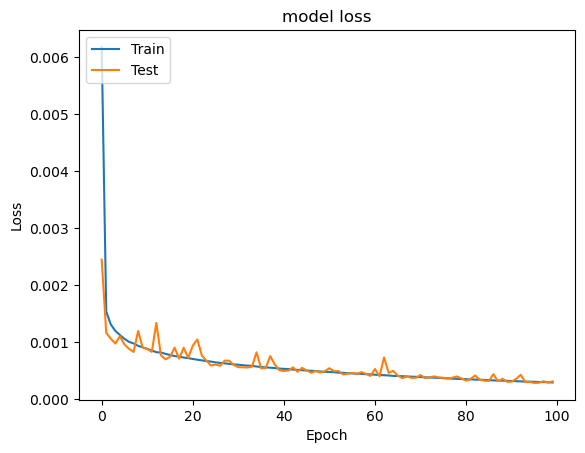

In [103]:
plot_his(history_12)

In [104]:
model_12.evaluate(X_test,Y_test)

1519/1519 [==============================] - 3s 2ms/step - loss: 3.1648e-04 - rmse: 4.3013e-04 - mae: 3.1648e-04 - mse: 1.8501e-07 - mape: 1284.2216


[0.0003164773515891284,
 0.00043013173853978515,
 0.0003164773515891284,
 1.8501330600884103e-07,
 1284.2215576171875]

# GPR
GAUSSIAN PROCESS REGRESSION
link - https://www.kaggle.com/code/residentmario/gaussian-process-regression-and-classification

Link_1 = https://www.kaggle.com/discussions/questions-and-answers/47716

Link_2 = https://www.kaggle.com/code/residentmario/gaussian-process-regression-and-classification

Link_3 = https://www.kaggle.com/code/sterby/gaussian-process-regression-benchmark


# SVR
Support vector regressor

In [105]:
from sklearn.svm import SVR, LinearSVR

In [106]:
svr = SVR().fit(X, Y)
print(svr)

SVR()


In [107]:
y_pred_svr = svr.predict(X)

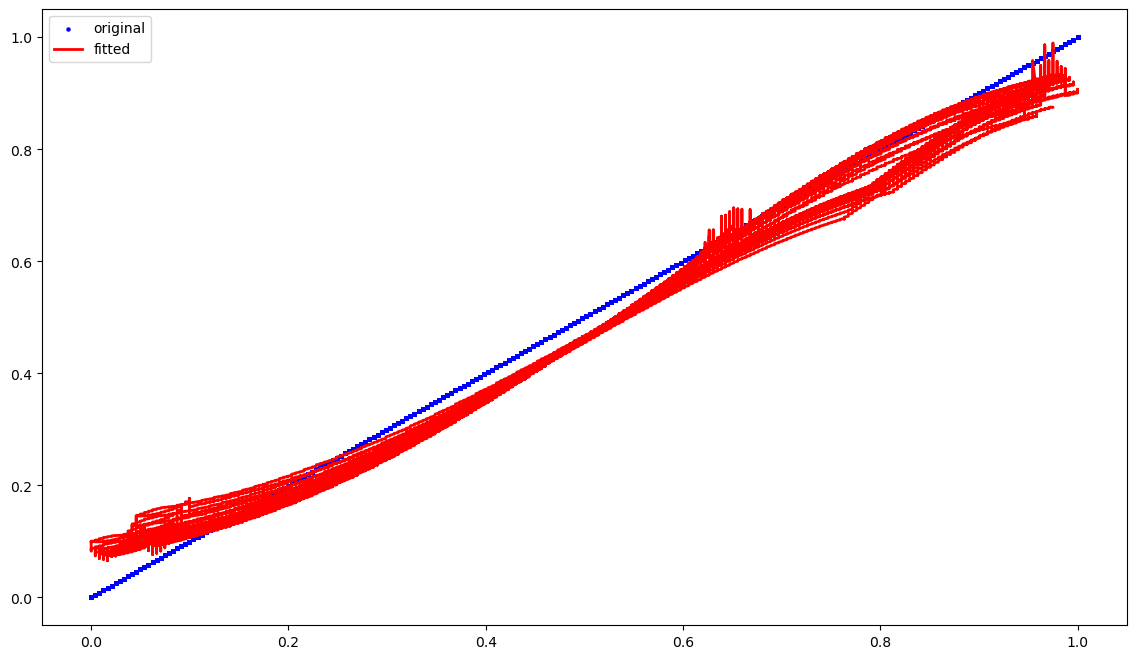

In [108]:
plt.figure(figsize=(14,8))
plt.scatter(Y, Y, s=5, color="blue", label="original")
plt.plot(Y, y_pred_svr, lw=2, color="red", label="fitted")
plt.legend()
plt.show()

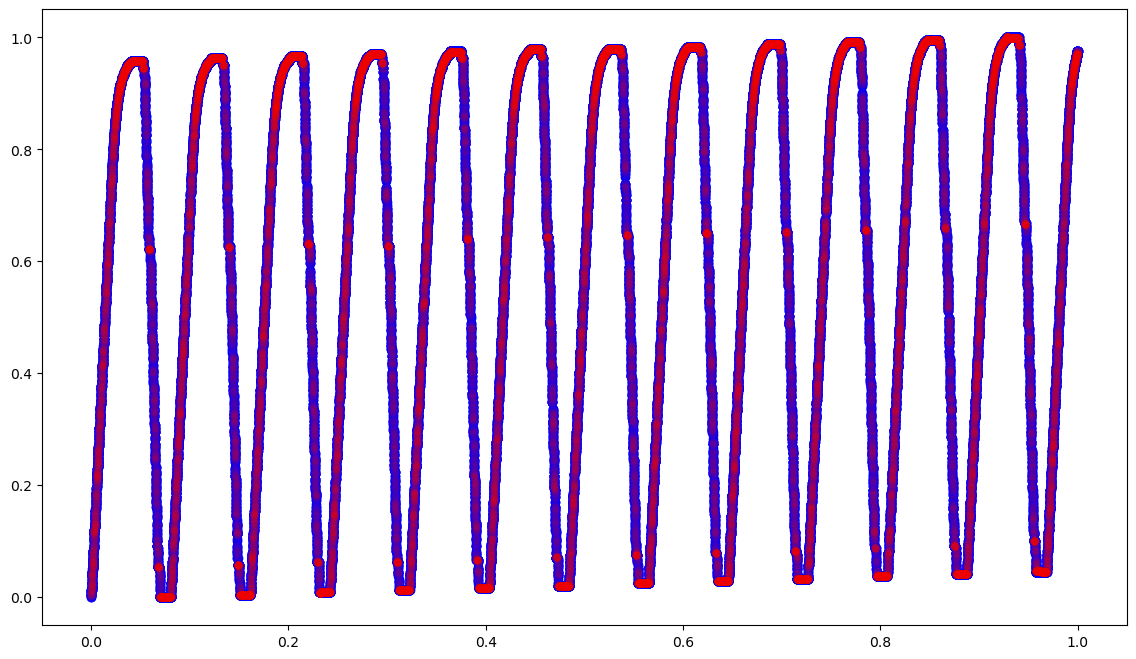

In [109]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_5,color='red',alpha=0.05,linewidths=0.02)
plt.show()

In [110]:
from sklearn.metrics import mean_squared_error
score = svr.score(X,Y)
print("R-squared:", score)
print("MSE:", mean_squared_error(Y, y_pred_svr))

R-squared: 0.978658427182689
MSE: 0.0028744604226998184


In [111]:
kernel = ['linear','rbf']        # For both the kernel
for i in kernel:
  model = SVR(kernel=i,C=1.0)
  model.fit(X_train,Y_train)
  print(f"For Kernel {i}")
  print("Accuracy is :", model.score(X_test,Y_test))

For Kernel linear
Accuracy is : 0.9573840508703488
For Kernel rbf
Accuracy is : 0.9786521327727467


# RandomForest

link_1 = https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [113]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
y_pred_rf = rf.predict(X_test)

In [114]:
rf.score(X_test,Y_test)

0.9999999997136395

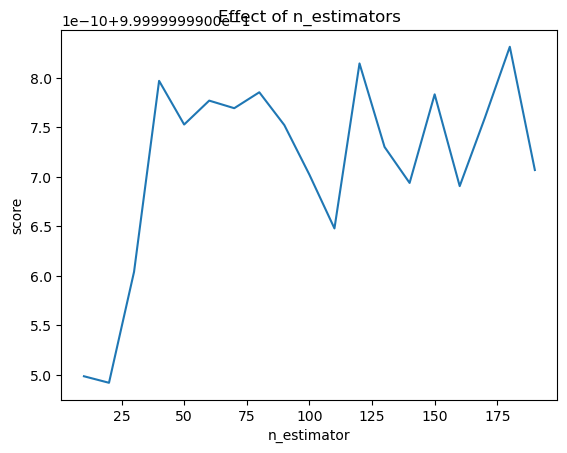

In [115]:
model = RandomForestRegressor()
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [116]:
for i in scores:
  print(f"score is : {i}")

score is : 0.9999999994985392
score is : 0.9999999994919411
score is : 0.9999999996041099
score is : 0.9999999997971063
score is : 0.9999999997529646
score is : 0.9999999997771285
score is : 0.9999999997694681
score is : 0.9999999997855595
score is : 0.9999999997523651
score is : 0.9999999997022906
score is : 0.9999999996479523
score is : 0.9999999998147014
score is : 0.999999999730295
score is : 0.9999999996939257
score is : 0.9999999997834628
score is : 0.9999999996907109
score is : 0.9999999997594522
score is : 0.9999999998315431
score is : 0.9999999997069755


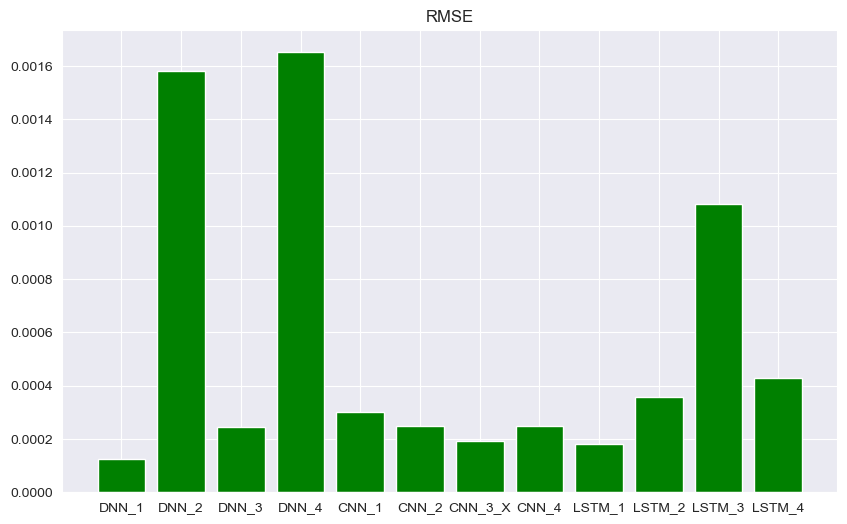

In [16]:

rmse_score = { 'DNN_1':0.000124903,'DNN_2':0.001580797,'DNN_3':0.00024606,'DNN_4':0.00165169,'CNN_1':0.00030274,
              'CNN_2':0.00024752,'CNN_3_X':0.0001937482,'CNN_4':0.00024752,'LSTM_1':0.0001818,
             'LSTM_2':0.000358092, 'LSTM_3':0.00108152, 'LSTM_4':0.000430131 }
names = list(rmse_score.keys())
values = list(rmse_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(rmse_score)), values, tick_label=names,color='green')

plt.title('RMSE')
plt.show()

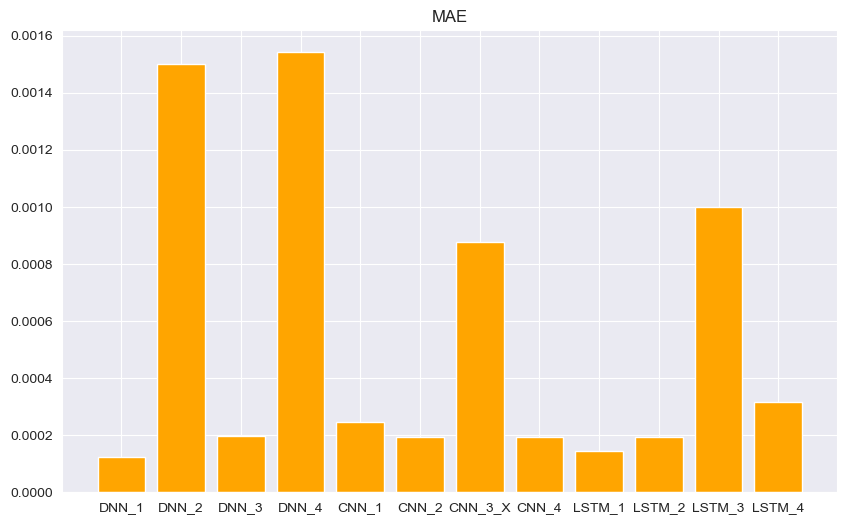

In [19]:
mae_score = {'DNN_1':0.00012197381,'DNN_2':0.0015,'DNN_3':0.000198389,'DNN_4':0.0015421,'CNN_1':0.0002456,
              'CNN_2':0.0001949,'CNN_3_X':0.000875852,'CNN_4':0.00019496,'LSTM_1':0.00014606,
             'LSTM_2':0.0001939, 'LSTM_3':0.00099921, 'LSTM_4':0.0003164 }

names_mae = list(mae_score.keys())
values_mae = list(mae_score.values())

plt.figure(figsize=(10,6))
plt.bar(range(len(mae_score)), values_mae, tick_label=names_mae,color='orange')
plt.title('MAE')
plt.show()